# (Investigating Courses Data )
## by (Omar Waheed )

## Investigation Overview

> In this investigation I tried to find all valuable relations between variables and each other to make the best use of the data set  

## Dataset Overview

> This data set is sample of udemy courses data  gathered by using udemy devolper api and consists of 3682 row and 12 column this data collected at the beginning of 2020 for analysis purpose .
>here is the most important data columns .

| column name | usage |
|--|--|
| title | course name on the site  | 
| avg_rating | course rate  | 
| current_price | current course price  | 
| num_subscribers | number of course subscribers | 
| num_reviews | number of reviews for the course | 
| num_lectures | number of course lectures  | 
| primary_category | the main category that this course belong to  | 
| primary_subcategory | the sub category that this course belong to | 
| course_creation_date | date of creation  |
| course_level | the level of knowledge this course belongs to  |


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
base_color = sb.color_palette()[0]
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
courses_data = pd.read_csv('MyUdemyCoursesData.csv')
courses_data.head().T

,0,1,2,3,4
title,Deep Learning : Computer Vision Beginner to Ad...,Machine Learning and Data Science Hands-on wit...,"Machine Learning (ML) Bootcamp: Python, Tensor...",Learn to Code with Python 3!,Mastering Visual Studio Code
url,https://www.udemy.com/course/deep-learning-pyt...,https://www.udemy.com/course/machine-learning-...,https://www.udemy.com/course/ml-bootcamp/,https://www.udemy.com/course/python3-for-begin...,https://www.udemy.com/course/mastering-visual-...
id,2494264,1978034,2229568,2371066,2664746
avg_rating,4.39286,3.72727,4.4375,4.11301,4.25806
price,199.99,199.99,189.99,199.99,49.99
current_price,11.99,11.99,11.99,11.99,11.99
headline,Go Beginner to Pro in Computer Vision in Pytor...,"Machine Learning, Statistics, Python, AI, Tens...","Master the 3 M's of ML: Maths, Methods and Mac...",Go from beginner to advanced with the Python p...,Boost your productivity by using the best IDE ...
num_subscribers,7758,46560,6860,92051,3119
num_reviews,85,1103,8,1191,31
num_lectures,74,522,48,78,66


In [3]:
courses_data.drop(columns=['url', 'primary_category_link' , 'primary_subcategory_link' , 'instructor_name' , 'instructor_Link' ,'what_you_will_learn' ,'description_non_formatted' , 'reviews' ,'small_image_link' , 'medium_image'],inplace=True)
courses_data.dropna(inplace=True)
courses_data["paid"] = 'paid'
# assign false to courses with price 0 
courses_data.loc[(courses_data.current_price == 0.0),'paid']="free"

In [4]:
time_series = courses_data.copy()
time_series["course_creation_date"]=  pd.to_datetime(time_series["course_creation_date"])
time_series['year']= time_series.course_creation_date.dt.year
time_series['month'] = time_series.course_creation_date.dt.month

## (Courses Creation Year Distribution)

Udemy was founded at 2010 so we can see it was growing rapidly over years and its courses become famous fast 

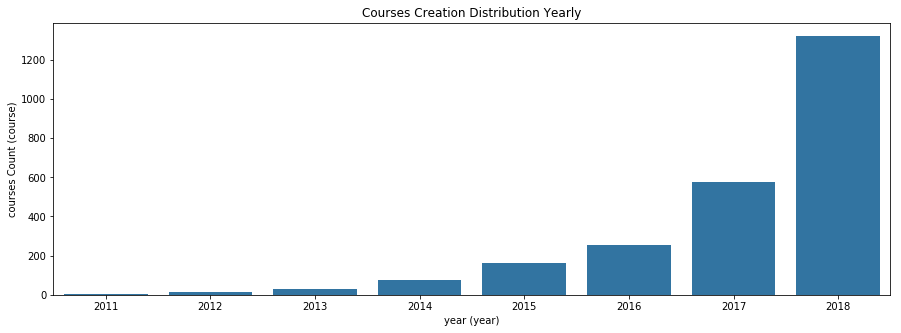

In [14]:
sb.countplot(data = time_series[time_series['year']<2019], x = 'year', color = base_color)
plt.title('Courses Creation Distribution Yearly')
plt.xlabel('year (year)')
plt.ylabel('courses Count (course)')
fig = plt.gcf()
fig.set_size_inches(15,5)

## ( Distribution Of paid vs free Courses)

> Udemy paid courses have more features than free courses as course duration is not limited with 2 hours  also students and instructors could connect together and paid courses provide a valuable certificate at the end of the course so both instructors and students prefer paid courses over free one  .

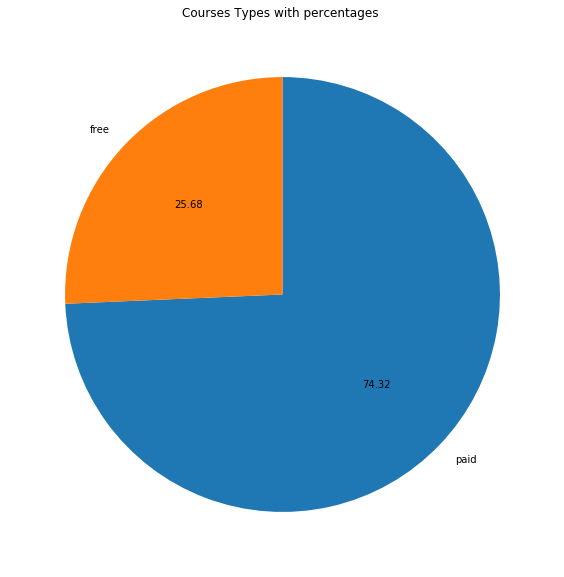

In [13]:
sorted_counts = courses_data['paid'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.2f');
plt.title('Courses Types with percentages ')
fig = plt.gcf()
fig.set_size_inches(20, 10)


## (Courses Price Distribution )

> As we mentioned udemy paid courses have more advantages and on the same times udemy prices is quite good that may explain why it had high demand courses range is very good  .

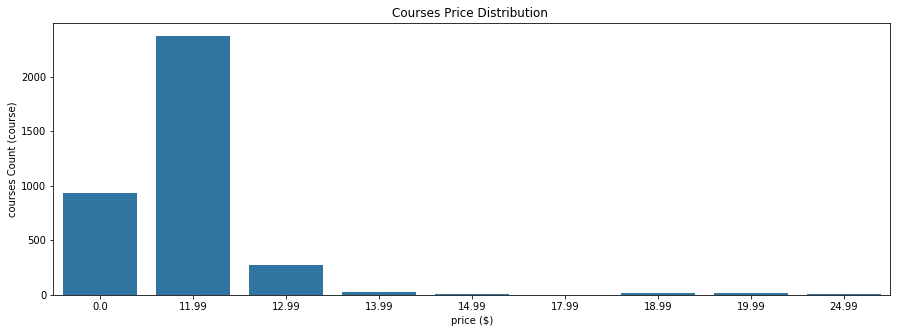

In [12]:
courses_data= courses_data[courses_data["current_price"]<=25]
time_series = time_series[time_series["current_price"]<=25]
sb.countplot( data=courses_data ,x='current_price',color = base_color)
plt.title('Courses Price Distribution ')
plt.xlabel('price ($)')
plt.ylabel('courses Count (course)')
fig = plt.gcf()
fig.set_size_inches(15, 5)

## (Course Level Distribution )

> If you are an instructor you are seeking the biggest part of customer so we see that courses that for all levels come in the first place while courses that is specific to some levels comes second 

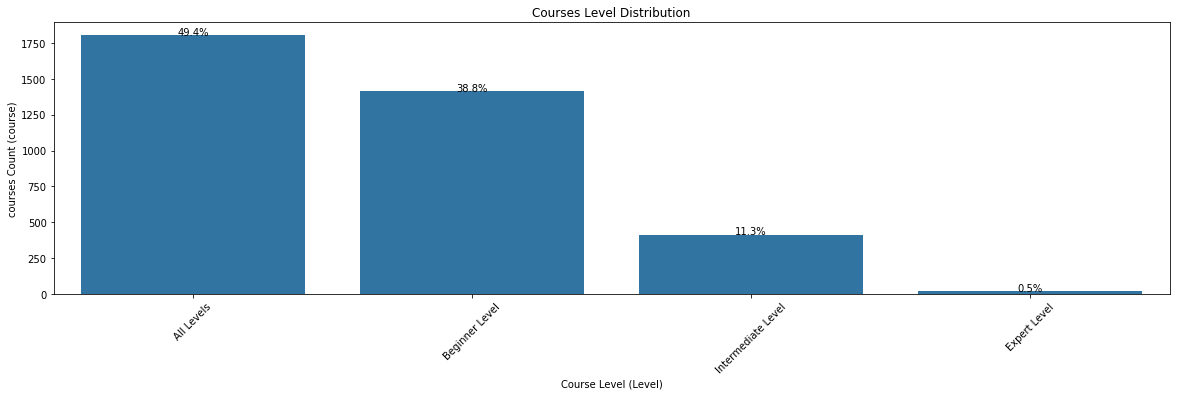

In [11]:
Levels_count = courses_data['course_level'].value_counts()
Levels_order = Levels_count.index

sb.countplot(data=courses_data, x='course_level', color=base_color, order=Levels_order);
df_count = courses_data.shape[0]
# Recalculating the type_counts just to have clarity.
type_counts = courses_data['course_level'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df_count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.title('Courses Level Distribution')
plt.xticks(rotation=45)
plt.xlabel('Course Level (Level)')
plt.ylabel('courses Count (course)')
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 5)

## (Courses average rating by color and Number of Subscribers )

> Both types of udemy courses free and paid get high ratings from subscribers as they listen for customers opinions and do the best for them 

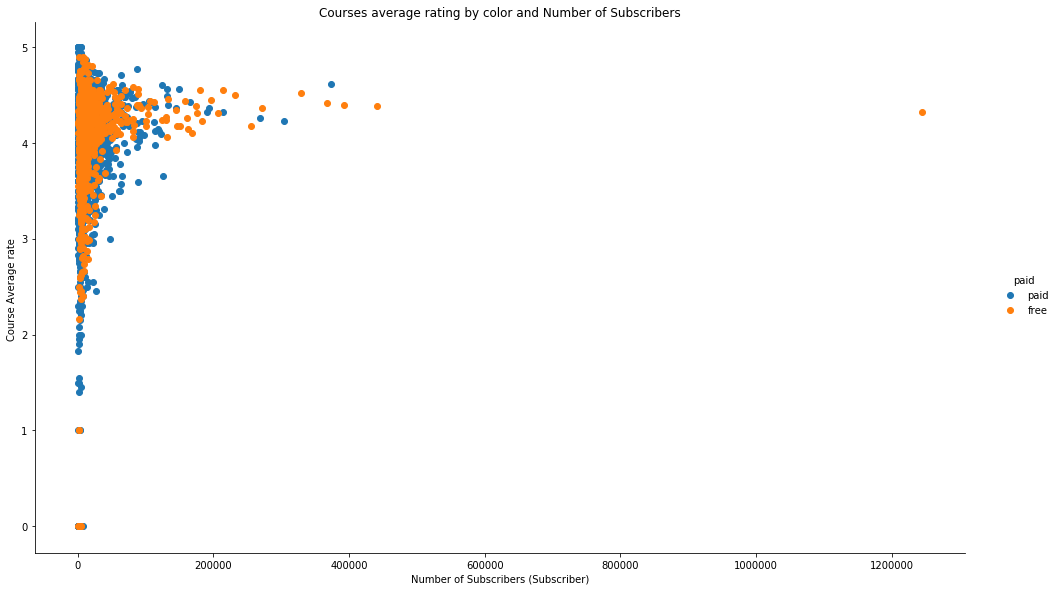

In [10]:
g = sb.FacetGrid(data = courses_data, hue = 'paid',size=10 )
g.map(plt.scatter, 'num_subscribers', 'avg_rating')
g.add_legend()
plt.title('Courses average rating by color and Number of Subscribers')
plt.xlabel('Number of Subscribers (Subscriber)')
plt.ylabel('Course Average rate ')
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(15, 8)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!